# Coursera Statistics for Data Science with Python Coursework with Boston Housing Dataset

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

import requests
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
response = requests.get(URL)

boston_df = pd.read_csv(io.BytesIO(response.content))


In [4]:
print("First few rows of the dataset:")
print(boston_df.head())

First few rows of the dataset:
   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  


### Median value of owner-occupied homes boxplot

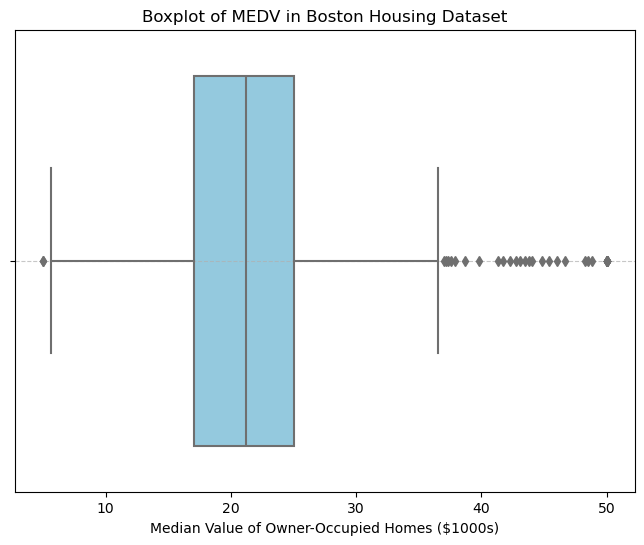

In [8]:
plt.figure(figsize=(8,6))
sns.boxplot(x='MEDV', data=boston_df, color='skyblue')
plt.xlabel('Median Value of Owner-Occupied Homes ($1000s)')
plt.title('Boxplot of MEDV in Boston Housing Dataset')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Provide a  bar plot for the Charles river variable

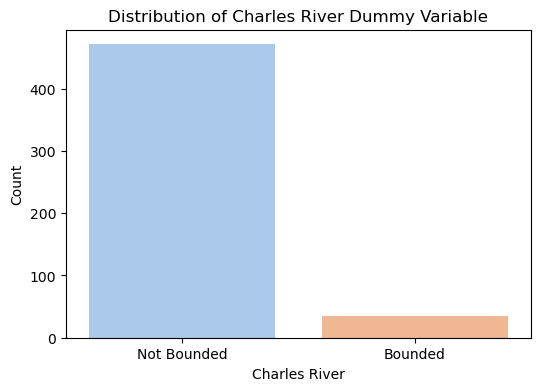

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='CHAS', data=boston_df, palette='pastel')
plt.xlabel('Charles River')
plt.ylabel('Count')
plt.title('Distribution of Charles River Dummy Variable')
plt.xticks([0, 1], ['Not Bounded', 'Bounded'])
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

c:\Users\s1074\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


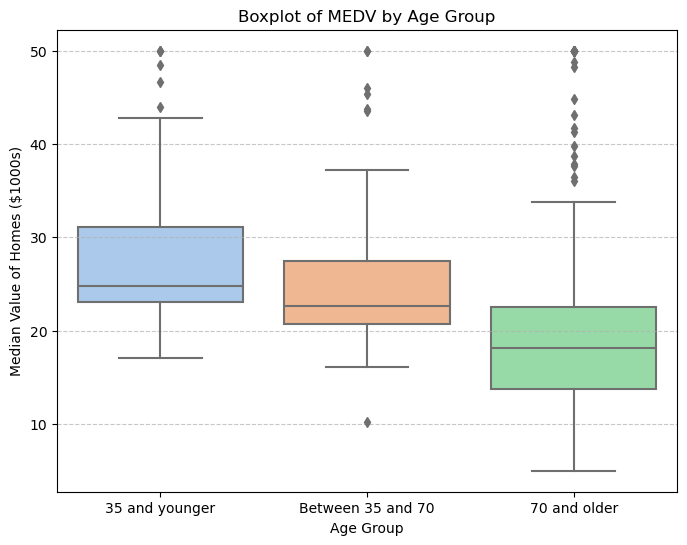

In [11]:
age_bins = [0, 35, 70, float('inf')]
age_labels = ['35 and younger', 'Between 35 and 70', '70 and older']
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

plt.figure(figsize=(8, 6))
sns.boxplot(x='Age_Group', y='MEDV', data=boston_df, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Homes ($1000s)')
plt.title('Boxplot of MEDV by Age Group')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

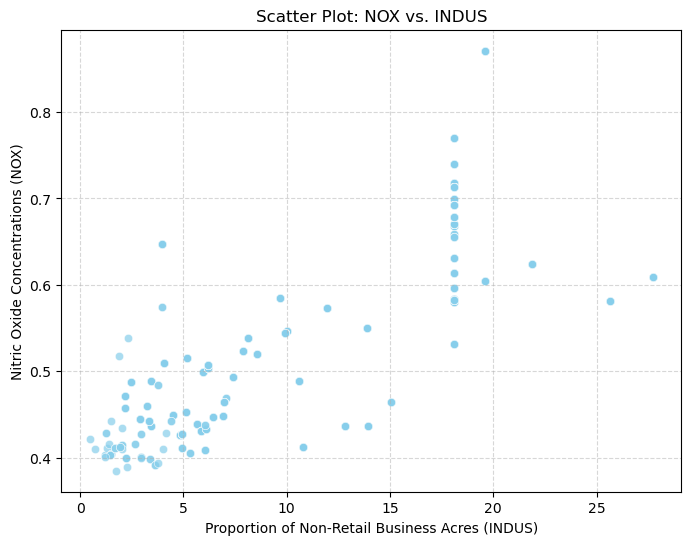

In [12]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df, color='skyblue', alpha=0.7)
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')
plt.title('Scatter Plot: NOX vs. INDUS')
plt.grid(axis='both', linestyle='--', alpha=0.5)
plt.show()

It seems that they are positively correlated

### Create a histogram for the pupil to teacher ratio variable

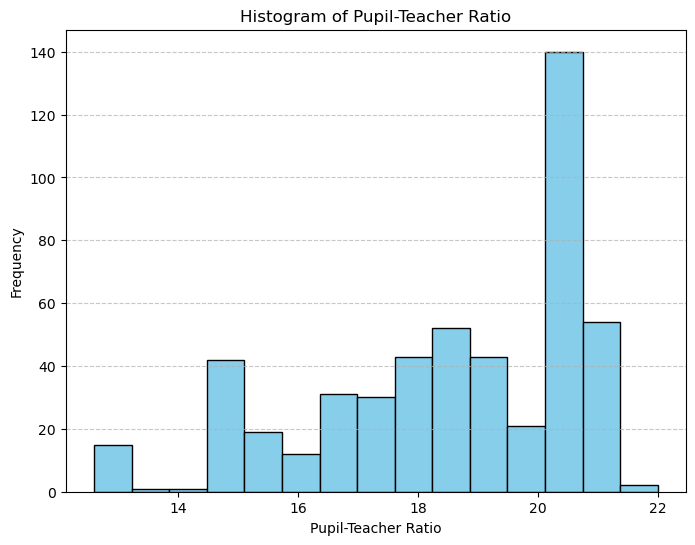

In [13]:
plt.figure(figsize=(8, 6))
plt.hist(boston_df['PTRATIO'], bins=15, color='skyblue', edgecolor='black')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Pupil-Teacher Ratio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Alternative hypothesis: There is a significant difference
Null hypothesis: No significant difference

In [21]:
import scipy.stats as stats

bounded = boston_df[boston_df['CHAS'] == 1]['MEDV']
not_bounded = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = stats.ttest_ind(bounded, not_bounded)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha/2:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")



T-statistic: 3.996437466090509
P-value: 7.390623170519905e-05
Reject the null hypothesis: There is a significant difference.


### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Alternative hypothesis: There is a significant difference
Null hypothesis: No significant difference

In [22]:
age_bins = [0, 35, 70, float('inf')]
age_labels = ['35 and younger', 'Between 35 and 70', '70 and older']
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_labels)

f_statistic, p_value = stats.f_oneway(*[group['MEDV'] for name, group in boston_df.groupby('Age_Group')])

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha/2:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

F-statistic: 36.40764999196599
P-value: 1.7105011022702984e-15
Reject the null hypothesis: There is a significant difference.


C:\Users\s1074\AppData\Local\Temp\ipykernel_33624\3648897834.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  f_statistic, p_value = stats.f_oneway(*[group['MEDV'] for name, group in boston_df.groupby('Age_Group')])


### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

H1: There is a positive correlation H0: There is no significant relationship

In [23]:
corr_coefficient, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Coefficient:", corr_coefficient)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("There is a significant positive correlation.")
else:
    print("There is no significant correlation.")

Pearson Correlation Coefficient: 0.7636514469209162
P-value: 7.913361061232958e-98
There is a significant positive correlation.


### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [24]:
import statsmodels.api as sm

X = boston_df[['DIS']]  # Weighted distance
y = boston_df['MEDV']   # Median value of owner-occupied homes

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        00:49:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

The p value is very small, close to zero, so we reject null hypothesis, suggesting a correlation betttwen weighted distance and the median value of owner-occupied homes.
The coefficient for DIS is 1.0916. This means that for every additional unit increase in the weighted distance, the median value of owner-occupied homes (MEDV) increases by approximately $1,091.60